Descrição do Projeto (99Freelas)

**Requisitos**: Estruturar um estudo estatístico usando Python (em Jupyter Notebook), com dados de diagnósticos aplicados entre 2022 e 2024.


**Objetivos**:

* Identificar padrões entre os participantes com melhor desempenho em cada nível de maturidade (são 4 níveis), com base em variáveis como tempo de registro, porte, faturamento, número de pessoas envolvidas, etc.

* Indicar o momento ideal para transição entre níveis, com base em evidências estatísticas.

* Calcular e analisar o gap (nota máxima esperada menos nota observada), considerando o ano e o nível.

* Apresentar/sugerir as metodologias estatísticas/matemáticas mais adequadas para esse tipo de análise.

**Observações**:
Gerei dados aleatórios para preservar as informações do cliente.


In [11]:
!pip install lifelines

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from lifelines import KaplanMeierFitter


In [13]:
# Read the locally generated CSV file
df = pd.read_csv("dados_GAP_Ano_Nivel.csv")


Exploração dos Dados

In [14]:
# Visualizar as primeiras linhas
df.head()

# Informações gerais
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_participante       1000 non-null   int64  
 1   ano                   1000 non-null   int64  
 2   nivel_maturidade      1000 non-null   int64  
 3   tempo_registro        1000 non-null   int64  
 4   porte                 1000 non-null   object 
 5   faturamento           1000 non-null   float64
 6   n_pessoas             1000 non-null   int64  
 7   nota_maxima_esperada  1000 non-null   int64  
 8   nota_observada        1000 non-null   float64
 9   nota                  1000 non-null   float64
 10  transicao             1000 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB


,id_participante,ano,nivel_maturidade,tempo_registro,faturamento,n_pessoas,nota_maxima_esperada,nota_observada,nota,transicao
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022.969000,2.324000,35.65500,1219.517820,15.988000,82.050000,62.998500,62.998500,0.435000
std,288.819436,0.778875,1.019835,11.75228,657.111406,3.905523,14.918782,20.333511,20.333511,0.496005
min,1.000000,2022.000000,1.000000,0.00000,243.760000,6.000000,60.000000,7.500000,7.500000,0.000000
25%,250.750000,2022.000000,1.000000,28.00000,763.180000,13.000000,60.000000,48.700000,48.700000,0.000000
50%,500.500000,2023.000000,2.000000,36.00000,1065.970000,16.000000,80.000000,65.250000,65.250000,0.000000
75%,750.250000,2024.000000,3.000000,44.00000,1469.950000,18.000000,95.000000,78.300000,78.300000,1.000000
max,1000.000000,2024.000000,4.000000,74.00000,5549.960000,29.000000,100.000000,100.000000,100.000000,1.000000


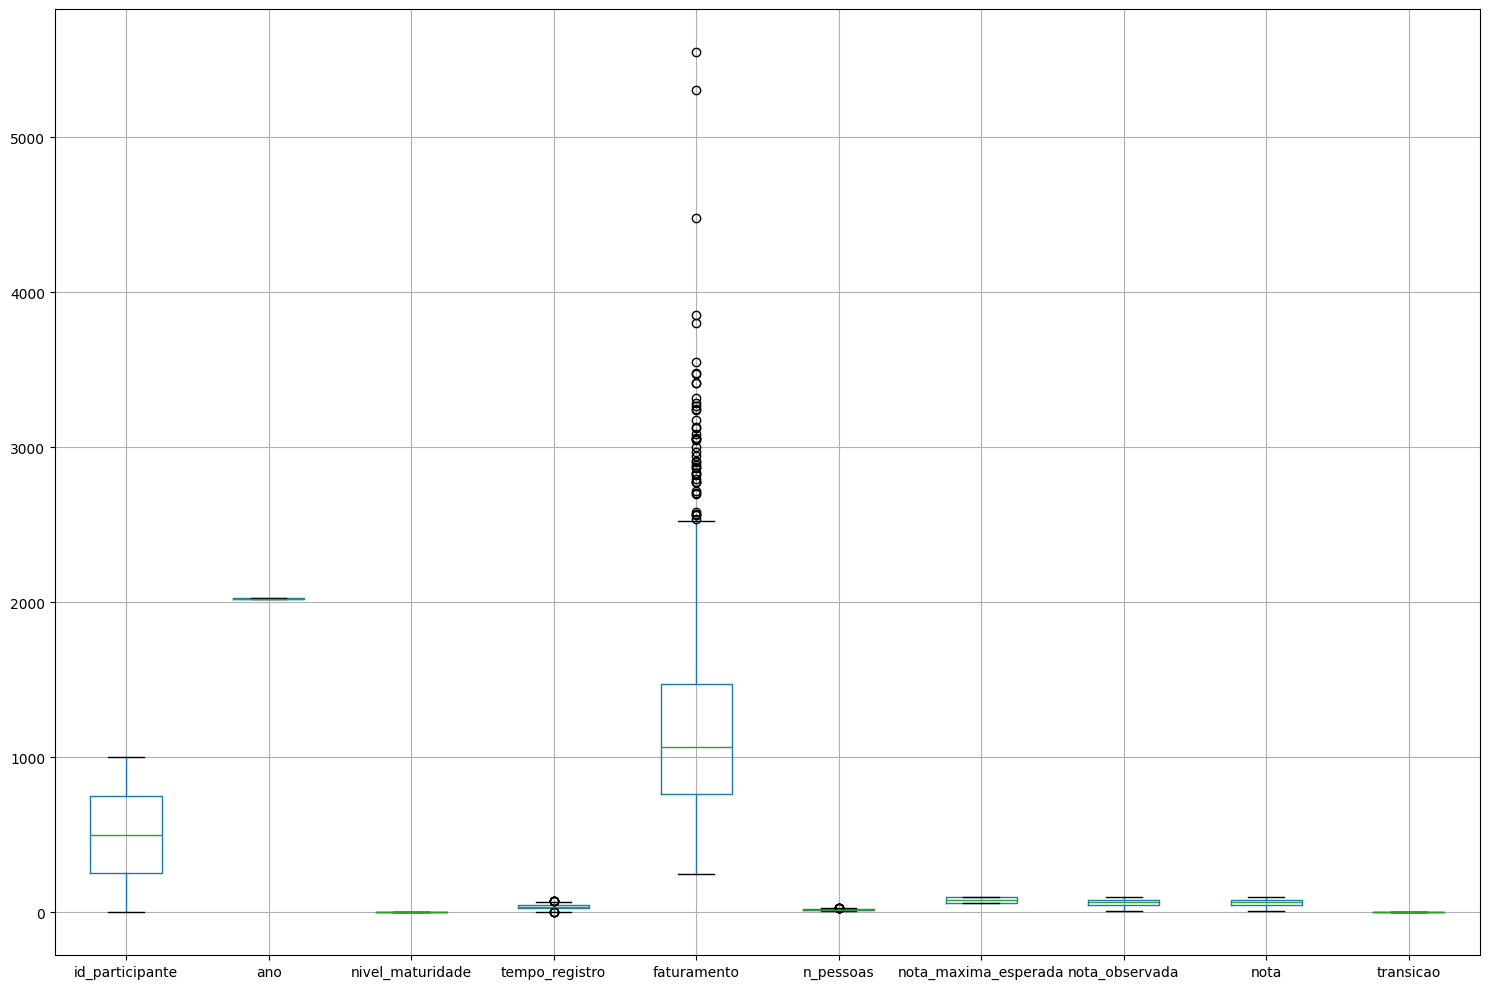

In [15]:
# boxplot = df.boxplot(column=['population','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'],figsize=(15, 10))
boxplot = df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

Boxplot faturamento vs. nível e outros

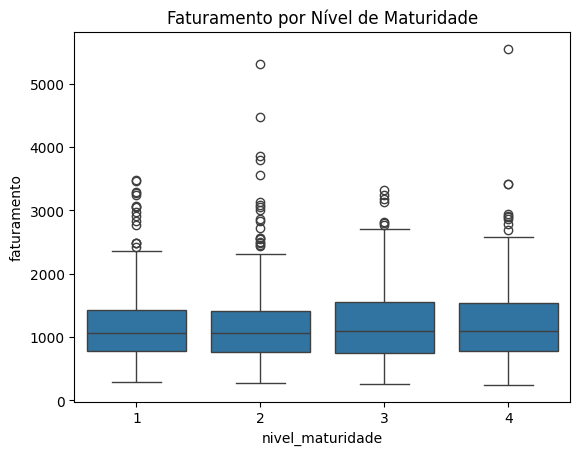

In [16]:
sns.boxplot(x='nivel_maturidade', y='faturamento', data=df)
plt.title('Faturamento por Nível de Maturidade')
plt.show()

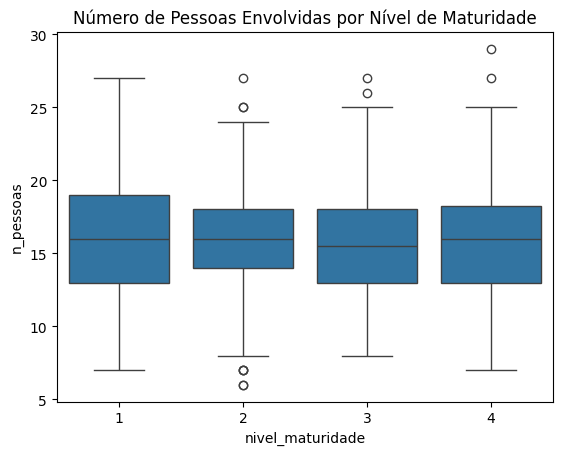

In [17]:
sns.boxplot(x='nivel_maturidade', y='n_pessoas', data=df)
plt.title('Número de Pessoas Envolvidas por Nível de Maturidade')
plt.show()

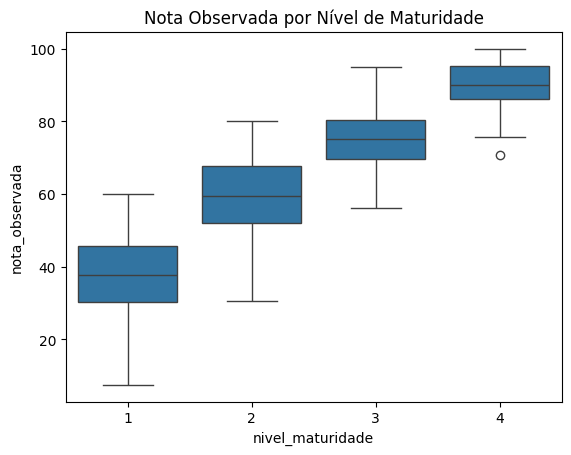

In [18]:
sns.boxplot(x='nivel_maturidade', y='nota_observada', data=df)
plt.title('Nota Observada por Nível de Maturidade')
plt.show()

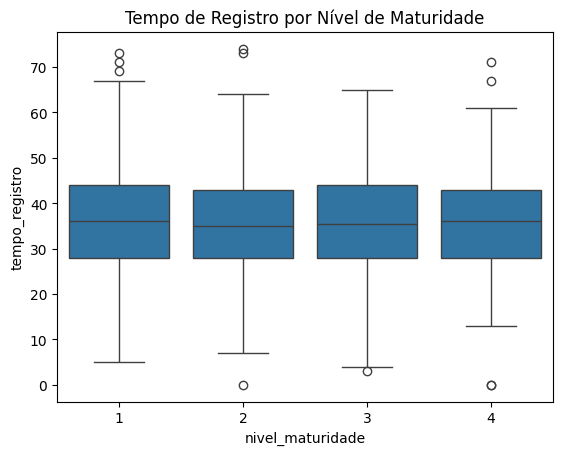

In [19]:
sns.boxplot(x='nivel_maturidade', y='tempo_registro', data=df)
plt.title('Tempo de Registro por Nível de Maturidade')
plt.show()

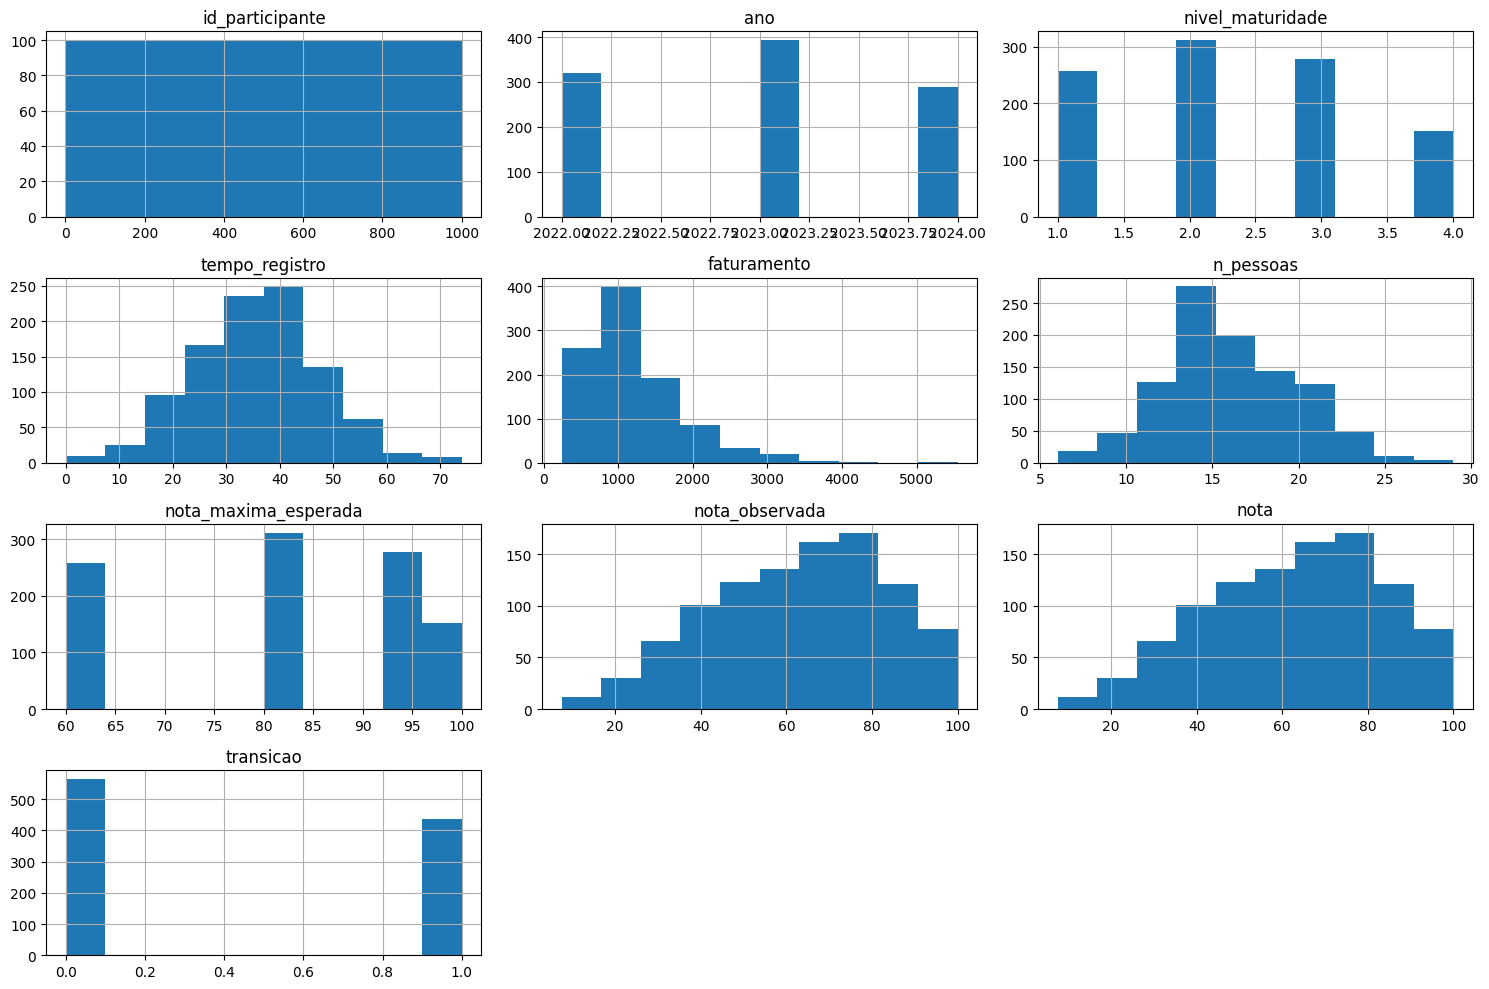

In [20]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

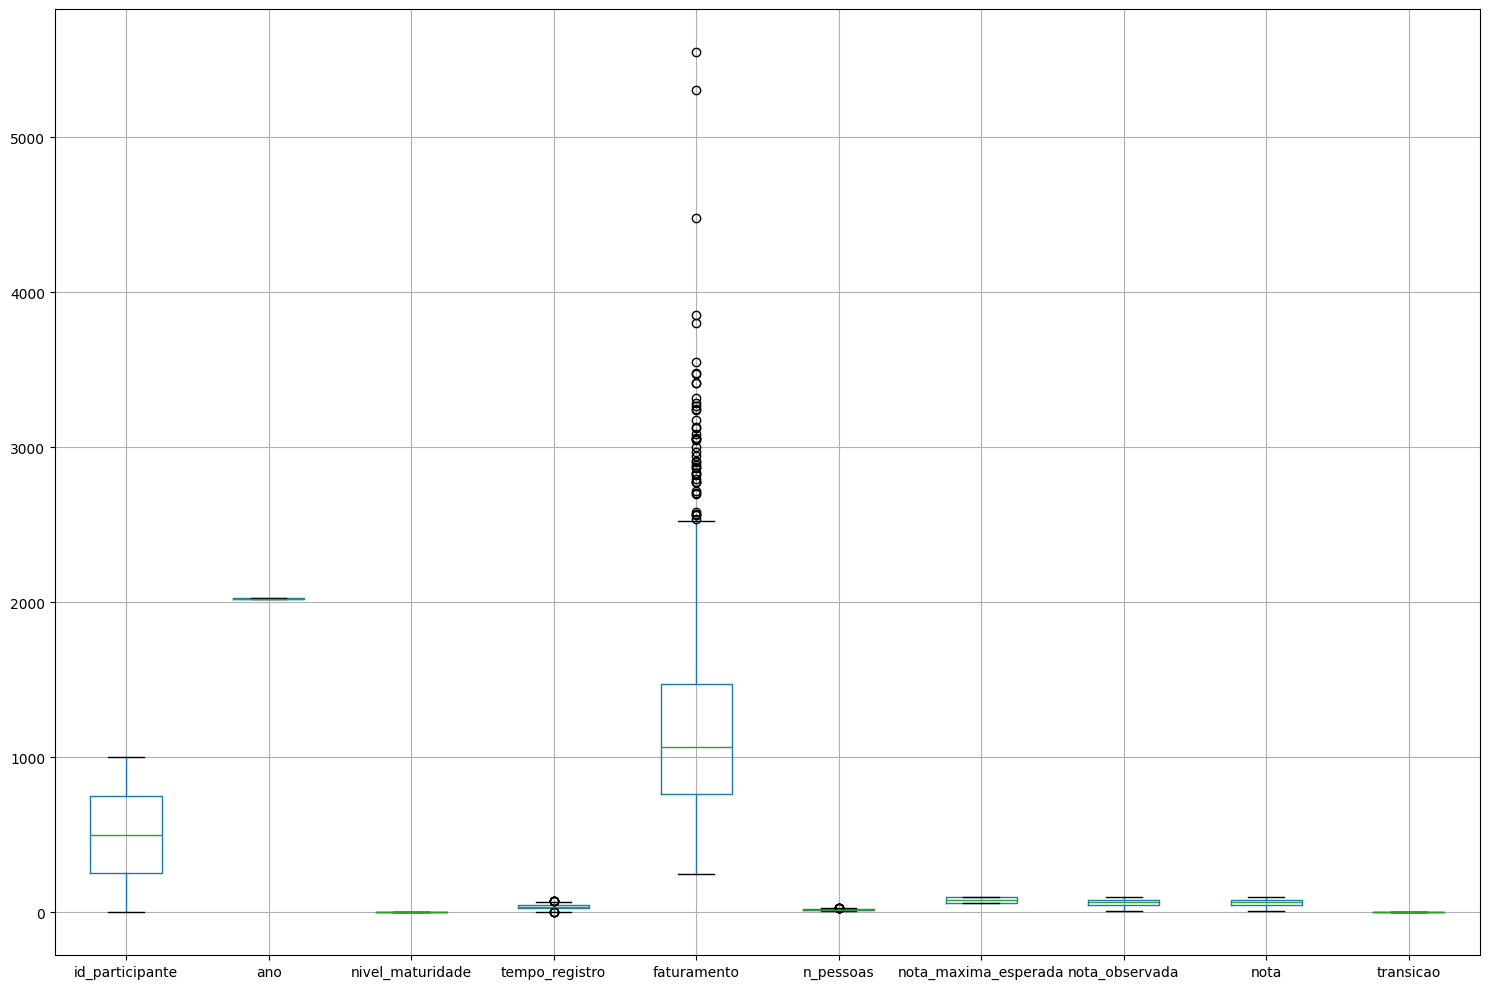

In [21]:
boxplot  = df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

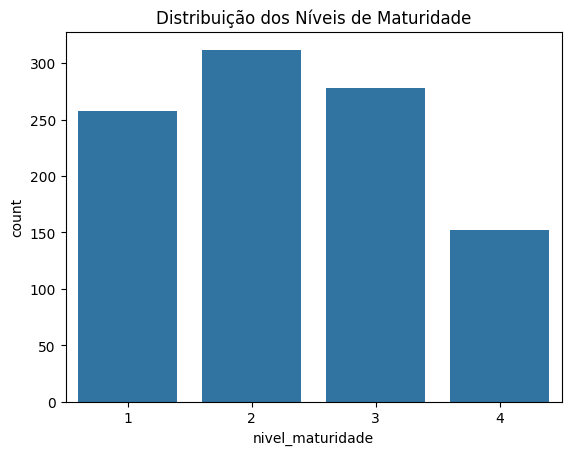

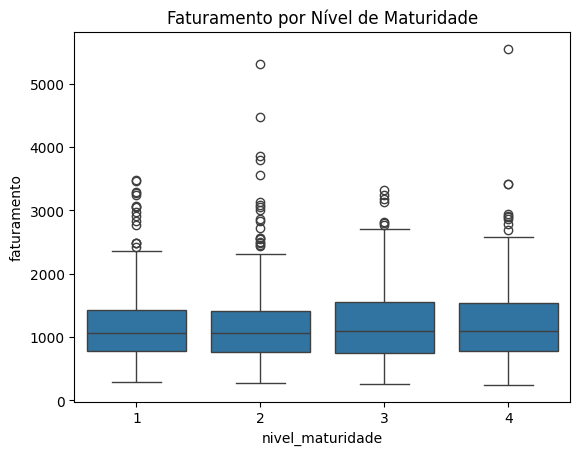

In [22]:
# Distribuição dos níveis de maturidade
sns.countplot(x='nivel_maturidade', data=df)
plt.title('Distribuição dos Níveis de Maturidade')
plt.show()

# Relação entre desempenho e outras variáveis, exemplo: faturamento
sns.boxplot(x='nivel_maturidade', y='faturamento', data=df)
plt.title('Faturamento por Nível de Maturidade')
plt.show()


Definição do que é alto desempenho.

Identificação de Padrões de Alto Desempenho
"alto desempenho" (ex: top 10% das notas em cada nível).


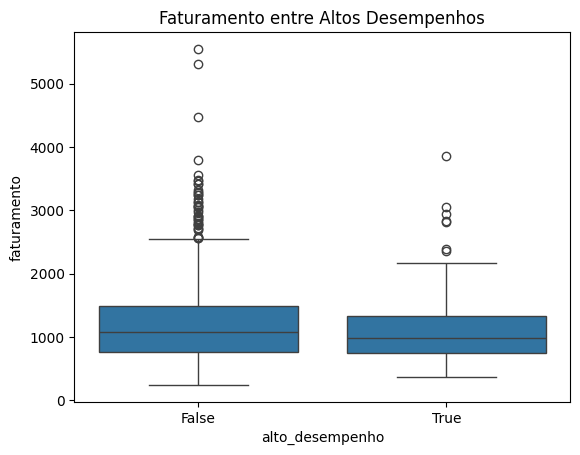

In [23]:
# Exemplo: identificar top 10% em cada nível
df['alto_desempenho'] = df.groupby('nivel_maturidade')['nota'].transform(
    lambda x: x >= x.quantile(0.9))

# Analisar variáveis por alto desempenho
sns.boxplot(x='alto_desempenho', y='faturamento', data=df)
plt.title('Faturamento entre Altos Desempenhos')
plt.show()

# Outras variáveis: porte, tempo_registro, pessoas, etc.


Para múltiplas comparações (exemplo: tempo de registro, número de pessoas):

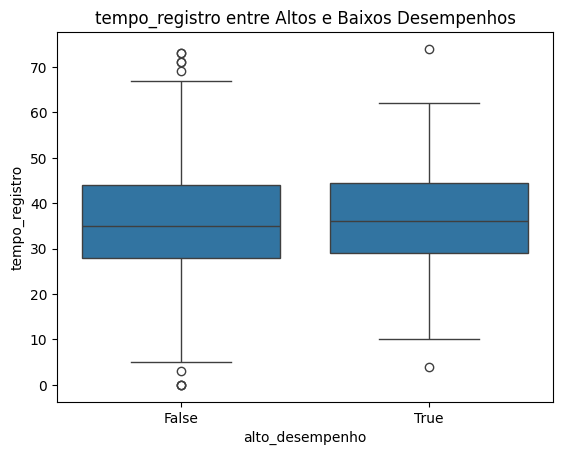

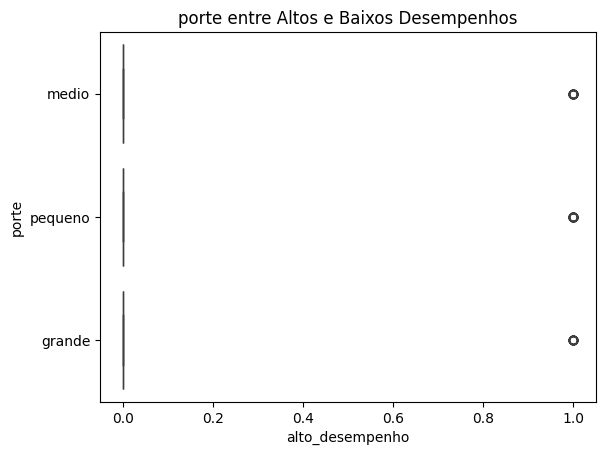

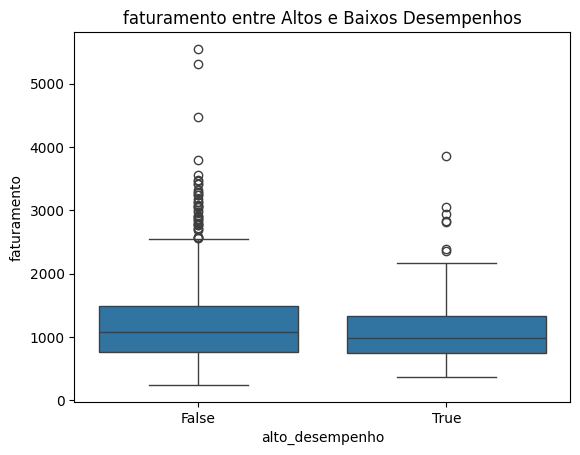

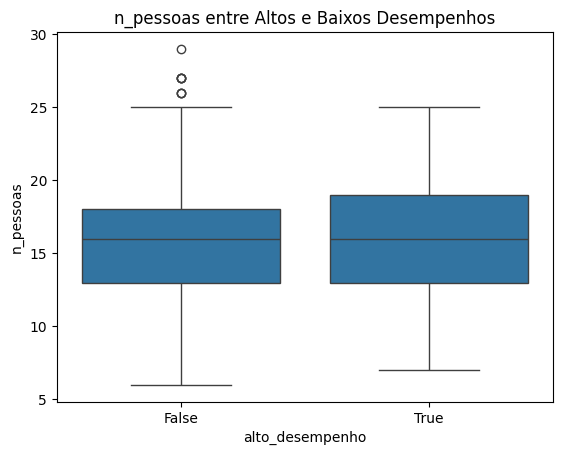

In [24]:
variaveis = ['tempo_registro', 'porte', 'faturamento', 'n_pessoas']
for var in variaveis:
    sns.boxplot(x='alto_desempenho', y=var, data=df)
    plt.title(f'{var} entre Altos e Baixos Desempenhos')
    plt.show()


Diferenças e Testes Estatísticos Entre Níveis

In [25]:
# Teste ANOVA para variáveis contínuas
stats.f_oneway(
    *[df[df['nivel_maturidade']==n]['faturamento'] for n in df['nivel_maturidade'].unique()]
)

# Para variáveis categóricas use qui-quadrado ou Kruskal-Wallis se não for paramétrico


F_onewayResult(statistic=np.float64(0.26784285297417787), pvalue=np.float64(0.8486039433763914))

Clusterização para Padrões Não Evidentes

In [26]:
# Selecionar apenas variáveis numéricas e remover nulos
#X = df[variaveis].dropna()
#kmeans = KMeans(n_clusters=4)
#clusters = kmeans.fit_predict(X)
#df.loc[X.index, 'cluster'] = clusters

#sns.pairplot(df, hue='cluster', vars=variaveis)
#plt.show()

#==========================================================
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Exemplo: supondo que 'porte' é uma coluna do seu DataFrame
le = LabelEncoder()
df['porte_encoded'] = le.fit_transform(df['porte'])

# Agora use apenas variáveis numéricas na clusterização
variaveis_corrigidas = ['tempo_registro', 'porte_encoded', 'faturamento', 'n_pessoas']
X_corrigido = df[variaveis_corrigidas].dropna()

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_corrigido)

# Adicione os clusters ao dataframe
df.loc[X_corrigido.index, 'cluster'] = clusters


Apresentação visual dos clusters


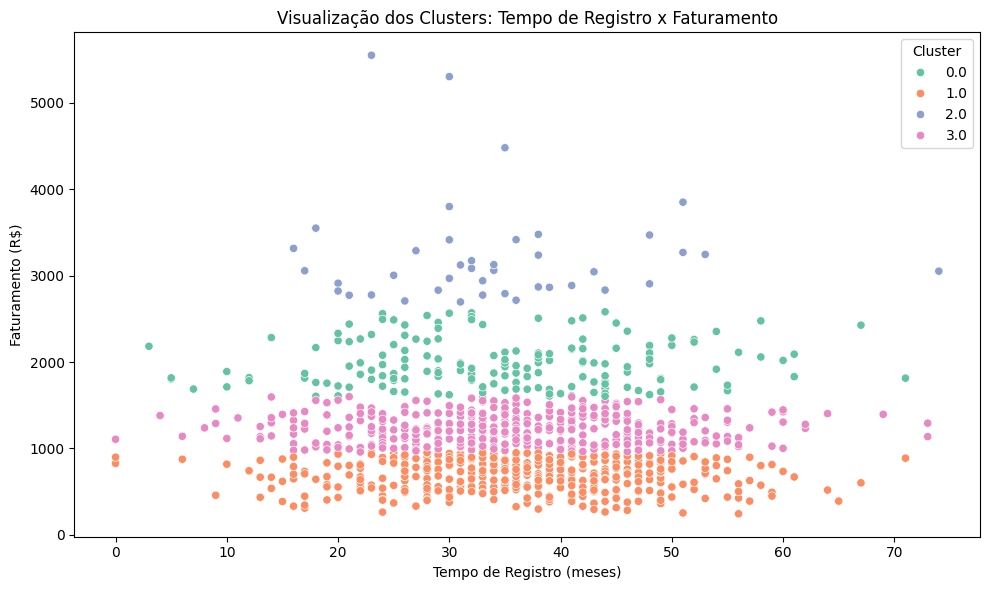

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Apenas para os dados usados na clusterização, garantindo integridade dos índices
dados_cluster = df.loc[X_corrigido.index].copy()

sns.scatterplot(
    x='tempo_registro',
    y='faturamento',
    hue='cluster',
    palette='Set2',
    data=dados_cluster,
    legend='full'
)

plt.title('Visualização dos Clusters: Tempo de Registro x Faturamento')
plt.xlabel('Tempo de Registro (meses)')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Previsão de Momento Ideal para Transição de Nível
Modelos de sobrevivência, como Kaplan-Meier, para ver em que momento (por tempo de registro ou outro critério) ocorrem as transições de nível.

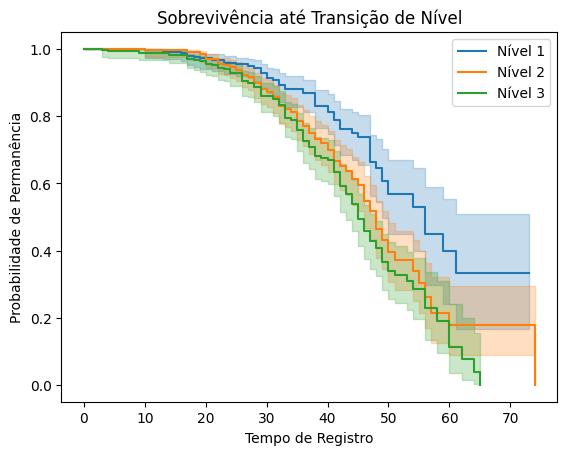

In [28]:
# Crie uma variável de 'sobrevivência': tempo até transição.
kmf = KaplanMeierFitter()

for nivel in range(1, 4):  # niveis 1 a 3
    grupo = df[df['nivel_maturidade'] == nivel]
    T = grupo['tempo_registro']
    E = grupo['transicao']  # 1 se houve transição, 0 caso contrário
    kmf.fit(T, event_observed=E, label=f'Nível {nivel}')
    kmf.plot()

plt.title('Sobrevivência até Transição de Nível')
plt.xlabel('Tempo de Registro')
plt.ylabel('Probabilidade de Permanência')
plt.show()


Observação: a lógica depende de haver uma variável booleana indicando se houve transição.


Análise de GAP

                       count       mean        std  min     25%    50%  \
ano  nivel_maturidade                                                    
2022 1                  85.0  21.681176  12.526919  0.0  14.900  20.60   
     2                 102.0  19.294118  10.907667  0.0  11.350  19.70   
     3                  78.0  20.284615   8.074267  0.0  15.950  20.45   
     4                  54.0   9.266667   6.033898  0.0   4.475  10.45   
2023 1                 105.0  22.539048  11.234695  0.0  15.200  23.40   
     2                 124.0  20.908065  10.201830  2.1  13.050  21.10   
     3                 104.0  19.498077   8.202805  1.1  13.400  19.05   
     4                  60.0   9.293333   6.369947  0.0   4.750   9.10   
2024 1                  68.0  21.480882  12.106064  0.0  13.700  21.25   
     2                  86.0  21.280233  10.040363  0.7  13.050  21.30   
     3                  96.0  19.958333   7.824034  0.0  14.475  20.15   
     4                  38.0  10.70000

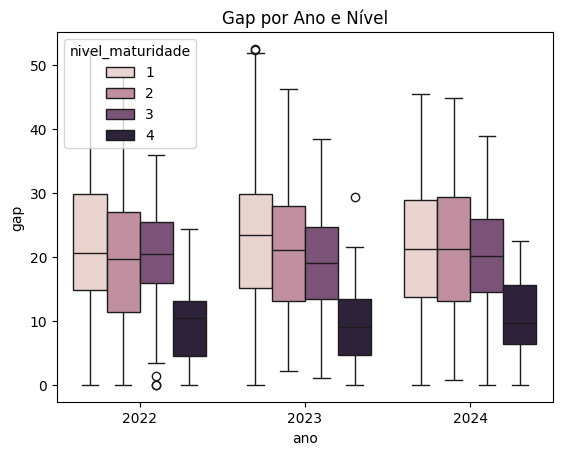

In [29]:
# Calcular o gap
df['gap'] = df['nota_maxima_esperada'] - df['nota_observada']

# Analisar por ano e nível
gap_agg = df.groupby(['ano', 'nivel_maturidade'])['gap'].describe()
print(gap_agg)

sns.boxplot(x='ano', y='gap', hue='nivel_maturidade', data=df)
plt.title('Gap por Ano e Nível')
plt.show()


Importância das Variáveis (Feature Importance)

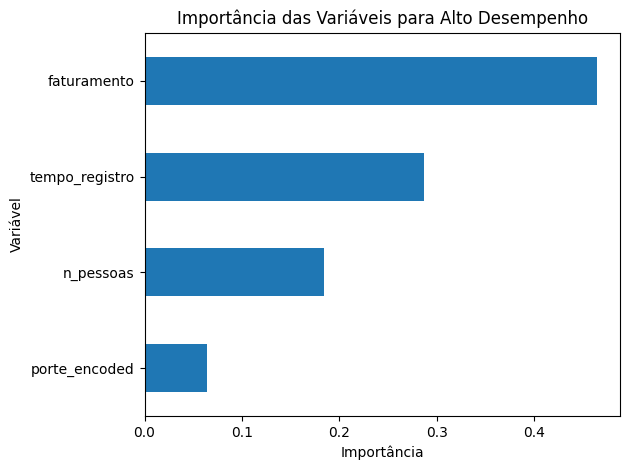

In [30]:
# Exemplo: Random Forest para classificar alto desempenho
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'porte' é categórica (string)
le = LabelEncoder()
# Crie a coluna apenas se ela ainda não existe
if 'porte_encoded' not in df.columns:
    df['porte_encoded'] = le.fit_transform(df['porte'])

# Atualize a lista de variáveis para incluir apenas numéricas
variaveis_numericas = ['tempo_registro', 'porte_encoded', 'faturamento', 'n_pessoas']

# Preenchendo valores nulos (se houver)
X = df[variaveis_numericas].fillna(0)
y = df['alto_desempenho'].astype(int)

# Modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Importância das variáveis
importances = pd.Series(model.feature_importances_, index=variaveis_numericas)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis para Alto Desempenho')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
